In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Retirer les termes à haute fréquence

Étude de l'équation différentielle suivante pour essayer de comprendre pourquoi on peut négliger des hautes fréquences qui on pourtant un dépendence sur $z(t)$

$$ \dot{z}(t) + \gamma z(t) = \alpha e^{i\omega t}z(t) $$
Solution exacte :
$$ z(t) = z_0 e^{-\int_{0}^{t}(\gamma - \alpha e^{i\omega t})} = z_0 e^{i\frac{\alpha}{\omega}} e^{-\gamma t -\frac{iα}{ω}e^{iω t}} = k e^{-\gamma t} e^{-\frac{iα}{ω}e^{iω t}}
= k e^{-\gamma t} e^{-u}$$
Où $ u = i (α/ω) e^{iω t} , \quad k \in \mathbb{C}$

Pour faire simple, les exemples sont plotté avec $k = 1$


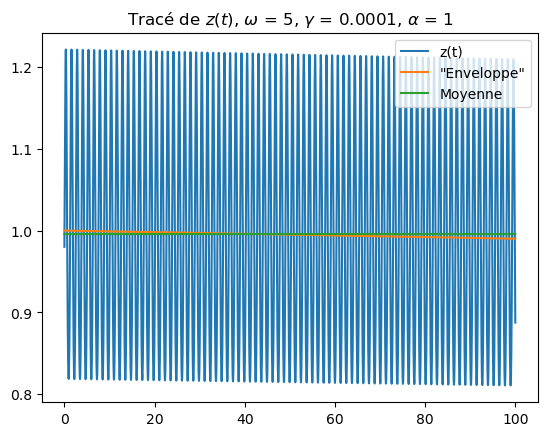

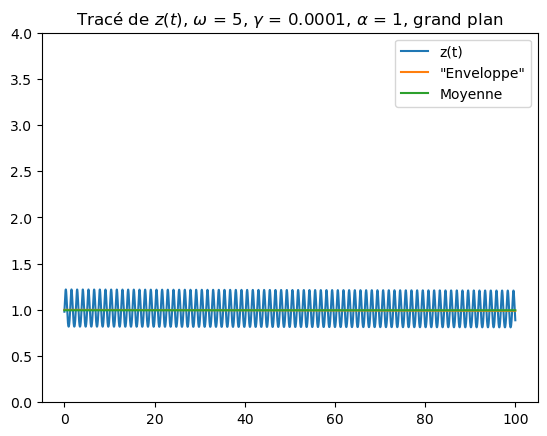

'\nthing_series = np.exp(-gamma_s*t)*(1 -u + 0.5*(u)**2 - (1/6)*(u)**3 + (1/24)*(u)**4)\nplt.plot(t, thing_series.real, label="")\nplt.plot(t, np.exp(-gamma_s*t), )\nplt.show()\n\n\nv = (2/w)*(np.cos((w/2)*t)+np.sin((w/2)*t)*1j)*np.sin((w/2)*t)\nthing2 = np.exp(-gamma_s*t)*np.e**(-v)\nplt.plot(t, thing2.real)\nplt.show()\n\n#print(np.mean(thing.real))\n\n\n\nplt.plot(t, np.exp(-gamma_s*t))\nplt.ylim(0.5, 1)\n'

In [2]:

t = np.linspace(0, 100, 10000)
w = 5
gamma_s = 0.0001 # small


alpha = 1

u = (alpha/w)*1j*(np.e**(w*t*1j))#(alpha/w)*1j*(np.cos(w*t) + np.sin(w*t)*1j)



thing = np.exp(-gamma_s*t)*np.e**(-u)
mean = np.mean(thing.real)
Mean = [mean for i in t]

#print(f"The mean {mean}")


plt.plot(t, thing.real, label="z(t)")
plt.plot(t, np.exp(-gamma_s*t), label='"Enveloppe"')
plt.plot(t, Mean, label="Moyenne")
plt.legend()
plt.title(f"Tracé de $z(t)$, $\omega$ = {w}, $\gamma$ = {gamma_s}, $\\alpha$ = {alpha}")
plt.show()

plt.plot(t, thing.real, label="z(t)")
plt.plot(t, np.exp(-gamma_s*t), label='"Enveloppe"')
plt.plot(t, Mean, label="Moyenne")
plt.legend()
plt.ylim(0, 4)
plt.title(f"Tracé de $z(t)$, $\omega$ = {w}, $\gamma$ = {gamma_s}, $\\alpha$ = {alpha}, grand plan")
plt.show()

'''
thing_series = np.exp(-gamma_s*t)*(1 -u + 0.5*(u)**2 - (1/6)*(u)**3 + (1/24)*(u)**4)
plt.plot(t, thing_series.real, label="")
plt.plot(t, np.exp(-gamma_s*t), )
plt.show()


v = (2/w)*(np.cos((w/2)*t)+np.sin((w/2)*t)*1j)*np.sin((w/2)*t)
thing2 = np.exp(-gamma_s*t)*np.e**(-v)
plt.plot(t, thing2.real)
plt.show()

#print(np.mean(thing.real))



plt.plot(t, np.exp(-gamma_s*t))
plt.ylim(0.5, 1)
'''

Si $ω >> γ$, la moyenne de la courbe équivaut à "l'enveloppe" de la courbe. Dans ces cas là, on se permet de négliger le terme oscillant $e^{i\omega t}z(t)$. C'est une manière d'isoler l'enveloppe lentement variable car c'est ce qui compte en moyenne.


Remarque : le signal oscillant ne ressemble pas toujours à une sinusoidale pure, ni strictement positif. Mais si la condition $ω >> γ$ est satisfaite, on peut trouver une intervalle de temps où l'enveloppe sera lentement variable est le signal oscillera très rapidement autour.

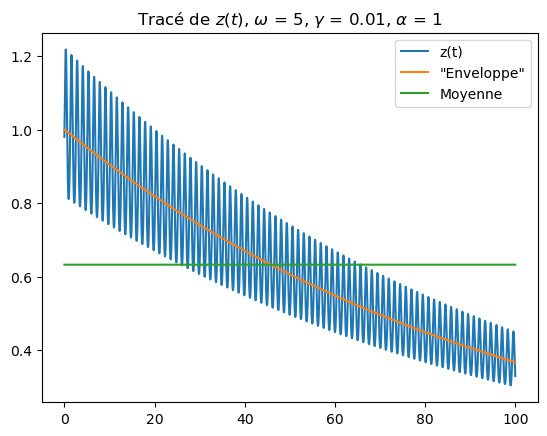

In [3]:

gamma_b = 0.01 # big
u = (alpha/w)*1j*(np.cos(w*t) + np.sin(w*t)*1j)

thing2 = np.exp(-gamma_b*t)*np.e**(-u)
mean2 = np.mean(thing2.real)
Mean2 = [mean2 for i in t]


plt.plot(t, thing2.real, label="z(t)")
plt.plot(t, np.exp(-gamma_b*t), label='"Enveloppe"')
plt.plot(t, Mean2, label="Moyenne")
plt.legend()
plt.title(f"Tracé de $z(t)$, $\omega$ = {w}, $\gamma$ = {gamma_b}, $\\alpha$ = {alpha}")
plt.show()

Dans ce cas là, $γ$ est trop grand (c'est un mauvais oscillateur). On ne peut donc pas faire ressortie "l'enveloppe" avec un moyennement sur cette echelle de temps.

<!-- Même si on décidait de choisir une intervalle de temps plus petite, où la variation de l'enveloppe sera miniscule, l'oscillation n'est plus assez rapide pour nous permettre de faire un moyenne fiable. -->


#### Une autre façon d'approcher le problème
Si on développe la partie oscillante :

$$ u = i (α/ω) e^{iω t} $$

$$ z(t) = e^{-\gamma t} e^{-\frac{iα}{ω}e^{iω t}} \\
= e^{-\gamma t} e^{-u} \\
= e^{-\gamma t}(1 - u - u^2 + -u^3 + ...)
$$

après moyennement :
$$z(t) = e^{-\gamma t}\cdot1$$


Les puissances de $u$ correspondent à des rotations sûr le plan complexe. Le module de chacunes de ces rotations de dépend pas du temps car le module de $e^{iω t}$ est toujours unitaire. Donc, sur beaucoup d'oscillations, les termes $u$ se trouveront toujours sur le même cercle et vont donc s'annuler entre eu pour faire une moyenne de 0 (la moyenne de tout les points sur la circonférence d'un cercle centré sur l'origine, c'est l'origine). De même pour tout les termes $u^2$, $u^3$, etc...

L'important, c'est que la fréquence d'oscillations $\omega$ soit assez haute par rapport au *dampening* $\gamma$, pour qu'on puisse trouver une intervalle de temps où **l'enveloppe ne varie que très lentement** ET **le nombre d'oscillations complètes est importante**.

Ces deux conditions nous permettent de justifier la prise de la moyenne (trop peu de points sur le cercle et la moyenne ne sera pas le centre) pour isoler une enveloppe qui n'a quasiment pas de dépendence avec le temps. Ce qui est équivalent à retirer le terme $\alpha e^{i\omega t}z(t)$ de l'équation différentielle de départ pour n'avoir que :

$$ \dot{z}(t) + \gamma z(t) = 0 $$




